# IEOR 142 Final Project - Predicting Spotify Track Popularity
Mina Baghai, Abhigyan Biswas, Toufiq Hossain, Naya Lee, Luna Ragot

# Data Cleaning

In [ ]:
# loading the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#artists = pd.read_csv('/content/drive/MyDrive/IEOR_142_Project/Data_Sets/artists.csv')
#tracks = pd.read_csv('/content/drive/MyDrive/IEOR_142_Project/Data_Sets/tracks.csv')

artists = pd.read_csv('/content/drive/MyDrive/artists.csv')
tracks = pd.read_csv('/content/drive/MyDrive/tracks.csv')

In [ ]:
artists.head()

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0


In [ ]:
tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [ ]:
#add length of id to see if there's more than one artist
tracks['len artist id'] = [len(i) for i in tracks['id_artists']]

#drop tracks with more than one artist
tracks = tracks[tracks['len artist id'] <= 26]

tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,len artist id
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,26
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,26
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,26
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,26
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,26


In [ ]:
#cleaning id_artists to match id of artists dataset
tracks['simplified_artist_id'] = [i.replace("['", '').replace("']", '') for i in tracks['id_artists']]

#merging datasets
tracks = tracks.merge(artists, left_on='simplified_artist_id', right_on='id')
tracks.head()

,id_x,name_x,popularity_x,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,valence,tempo,time_signature,len artist id,simplified_artist_id,id_y,followers,genres,name_y,popularity_y
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.44500,...,0.127,104.851,3,26,45tIt06XoI0Iio4LBEVpls,45tIt06XoI0Iio4LBEVpls,91.0,[],Uli,4
1,0PH9AACae1f957JAavhOl2,Lazy Boi,0,157333,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.298,0.46000,...,0.402,87.921,4,26,45tIt06XoI0Iio4LBEVpls,45tIt06XoI0Iio4LBEVpls,91.0,[],Uli,4
2,2SiNuAZ6jIU9xhClRKXcST,Sketch,0,87040,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.634,0.00399,...,0.396,79.895,4,26,45tIt06XoI0Iio4LBEVpls,45tIt06XoI0Iio4LBEVpls,91.0,[],Uli,4
3,4vV7uBcF2AnjNTOejBS5oL,L'enfer,0,40000,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.657,0.32500,...,0.105,81.944,5,26,45tIt06XoI0Iio4LBEVpls,45tIt06XoI0Iio4LBEVpls,91.0,[],Uli,4
4,598LlBn6jpEpVbLjmZPsYV,Graphite,0,104400,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.644,0.68400,...,0.138,100.031,4,26,45tIt06XoI0Iio4LBEVpls,45tIt06XoI0Iio4LBEVpls,91.0,[],Uli,4


In [ ]:

#cleaning columns and column names
tracks.rename(columns={'id_x': 'track_id', 'name_x': 'track_name', 'popularity_x': 'track_popularity', 'simplified_artist_id': 'artist_id', 'name_y': 'artist_name', 'popularity_y': 'artist_popularity'}, inplace=True)
tracks.drop(['artists', 'id_artists', 'id_y', 'len artist id'], axis=1, inplace=True)
tracks.head()

,track_id,track_name,track_popularity,duration_ms,explicit,release_date,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,time_signature,artist_id,followers,genres,artist_name,artist_popularity
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,1922-02-22,0.645,0.44500,0,-13.338,...,0.744,0.1510,0.127,104.851,3,45tIt06XoI0Iio4LBEVpls,91.0,[],Uli,4
1,0PH9AACae1f957JAavhOl2,Lazy Boi,0,157333,0,1922-02-22,0.298,0.46000,1,-18.645,...,0.856,0.4360,0.402,87.921,4,45tIt06XoI0Iio4LBEVpls,91.0,[],Uli,4
2,2SiNuAZ6jIU9xhClRKXcST,Sketch,0,87040,0,1922-02-22,0.634,0.00399,5,-29.973,...,0.919,0.1050,0.396,79.895,4,45tIt06XoI0Iio4LBEVpls,91.0,[],Uli,4
3,4vV7uBcF2AnjNTOejBS5oL,L'enfer,0,40000,0,1922-02-22,0.657,0.32500,10,-14.319,...,0.856,0.0931,0.105,81.944,5,45tIt06XoI0Iio4LBEVpls,91.0,[],Uli,4
4,598LlBn6jpEpVbLjmZPsYV,Graphite,0,104400,0,1922-02-22,0.644,0.68400,7,-8.247,...,0.802,0.0847,0.138,100.031,4,45tIt06XoI0Iio4LBEVpls,91.0,[],Uli,4


In [ ]:
#change date column from objects to int objects for modeling
#tracks['release_date'] = pd.to_datetime(tracks['release_date'], format = "%Y-%m-%d")
tracks['release_date'] = pd.to_datetime(tracks["release_date"]).dt.strftime("%Y%m%d")

Cleaning up genres column

In [ ]:
tracks.set_index('track_id', inplace=True)

In [ ]:
#changing from string to list of strings
clean = [i.replace("[", '').replace("]", '') for i in tracks['genres']]
clean = [k[1:-1].split("', '") for k in clean]

tracks['clean_genres'] = clean
tracks.drop('genres', inplace = True, axis=1)

In [ ]:
#onehotencoding genres
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)

df = tracks.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(tracks.pop('clean_genres')),
                index=tracks.index,
                columns=mlb.classes_))

In [ ]:
#only keeping genres that appear more than 8000 times in the dataset
drops = []
for i in range(4521 - 21):
  if df.iloc[::, i+21].sum() < 8000:
    drops.append(df.iloc[::, i+21].name)

df.drop(drops, axis=1, inplace=True)
tracks = df

In [ ]:
#replace all spaces in column names with underscores to make modeling easier
tracks.columns = tracks.columns.str.replace(' ', '_')
tracks.head()

,track_name,track_popularity,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,...,latin,latin_pop,lounge,mellow_gold,psychedelic_rock,rock,rock_en_espanol,soft_rock,soul,vocal_jazz
track_id,,,,,,,,,,,,,,,,,,,,,
35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,19220222,0.645,0.44500,0,-13.338,1,...,0,0,0,0,0,0,0,0,0,0
0PH9AACae1f957JAavhOl2,Lazy Boi,0,157333,0,19220222,0.298,0.46000,1,-18.645,1,...,0,0,0,0,0,0,0,0,0,0
2SiNuAZ6jIU9xhClRKXcST,Sketch,0,87040,0,19220222,0.634,0.00399,5,-29.973,0,...,0,0,0,0,0,0,0,0,0,0
4vV7uBcF2AnjNTOejBS5oL,L'enfer,0,40000,0,19220222,0.657,0.32500,10,-14.319,0,...,0,0,0,0,0,0,0,0,0,0
598LlBn6jpEpVbLjmZPsYV,Graphite,0,104400,0,19220222,0.644,0.68400,7,-8.247,1,...,0,0,0,0,0,0,0,0,0,0


# Regression Modeling

Splitting into training and testing set. Same training/testing datasets will be used throughout the regression and classification modeling sections.

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(tracks, test_size=0.3, random_state=88)

X_train = train.drop('track_popularity', axis=1)
y_train = train['track_popularity']
X_test = test.drop('track_popularity', axis=1)
y_test = test['track_popularity']
print(X_train.shape, X_test.shape)

(329026, 45) (141012, 45)


## OLS

In [ ]:
#calculate VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

def VIF(df, cols):
    values = sm.add_constant(df[cols]).values
    vif = [variance_inflation_factor(values, i) for i in range(len(cols)+1)]
    return pd.Series(vif[1:], index=cols)

VIF(train, ['duration_ms','explicit','danceability','energy','key','loudness','mode','acousticness',
            'instrumentalness','liveness','valence','tempo','time_signature','followers','artist_popularity'])

duration_ms          1.055264
explicit             1.051991
danceability         1.537024
energy               4.149880
key                  1.018456
loudness             2.502978
mode                 1.027044
acousticness         2.165865
instrumentalness     1.134507
liveness             1.078624
valence              1.705608
tempo                1.100166
time_signature       1.051884
followers            1.228751
artist_popularity    1.303838
dtype: float64

No need to drop any features due to high VIFs since they are all below 5

In [ ]:
import statsmodels.formula.api as smf

ols = smf.ols(formula='track_popularity ~ duration_ms + explicit + danceability + energy + key + loudness + mode + acousticness + instrumentalness + liveness + valence + tempo + time_signature + followers + artist_popularity',
                 data=train).fit()

print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:       track_popularity   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                 1.610e+04
Date:                Sat, 06 May 2023   Prob (F-statistic):               0.00
Time:                        16:58:58   Log-Likelihood:            -1.3180e+06
No. Observations:              329026   AIC:                         2.636e+06
Df Residuals:                  329010   BIC:                         2.636e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             8.9785      0.31

All of the p-values are now extremeley small, so we will not be removing any more features.

In [ ]:
# compute out-of-sample R-squared using the test set
def OSR2(model, df_train, df_test, dependent_var):
    y_test = df_test[dependent_var]
    y_pred = model.predict(df_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(df_train[dependent_var]))**2)
    return 1 - SSE/SST

In [ ]:
# compute test set RSS
def test_rss(model, df_train, df_test, dependent_var):
  y_test = df_test[dependent_var]
  y_pred = model.predict(df_test)
  return np.sum((y_test - y_pred)**2)

In [ ]:
ols_osr2 = OSR2(ols, train, test, 'track_popularity')
ols_test_rss = test_rss(ols, train, test, 'track_popularity')
print('Out-of-sample R-squared for OLS: ', ols_osr2)
print('Test RSS for OLS: ', ols_test_rss)

Out-of-sample R-squared for OLS:  0.418832640795064
Test RSS for OLS:  25052477.51463911


## CART - Regression Tree

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold

In [ ]:
dtr_X_train = X_train.drop(['track_name', 'artist_name', 'artist_id'], axis=1)
dtr_X_test = X_test.drop(['track_name', 'artist_name', 'artist_id'], axis=1)

dtr = DecisionTreeRegressor(min_samples_split=10,
                            ccp_alpha=0.02,
                            random_state = 88)
dtr.fit(dtr_X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  array = numpy.asarray(array, order=order, dtype=dtype)


DecisionTreeRegressor(ccp_alpha=0.02, min_samples_split=10, random_state=88)

Node count = 843


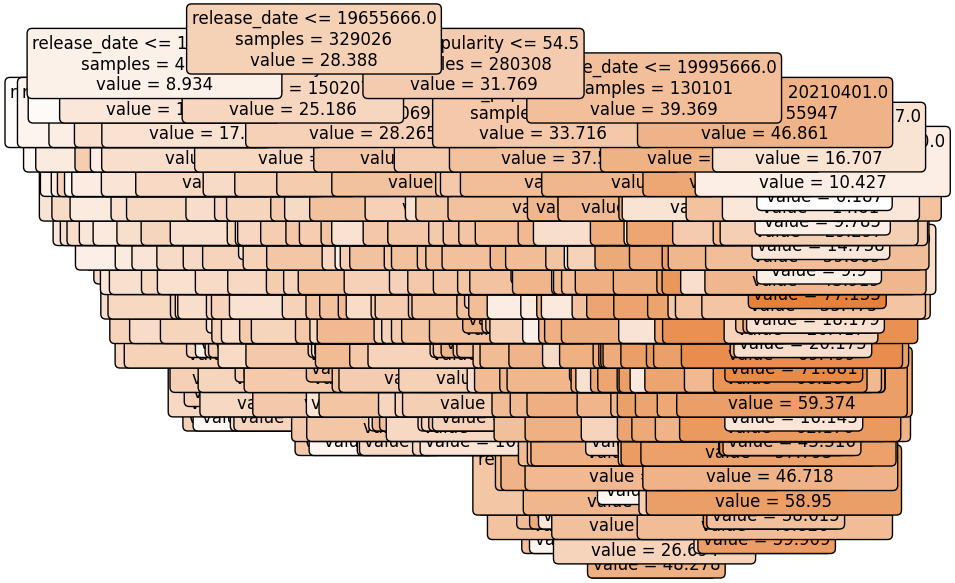

In [ ]:
print('Node count =', dtr.tree_.node_count)
plt.figure(figsize=(9,7))
plot_tree(dtr,
          feature_names=dtr_X_train.columns,
          class_names=['0','1'],
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=12)
plt.show()

In [ ]:
def OSR2(model, X_test, y_test, y_train):
    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
    return (1 - SSE/SST)

def test_RSS(model, X_test, y_test, y_train):
    y_pred = model.predict(X_test)
    return np.sum((y_test - y_pred)**2)

In [ ]:
dtr_osr2 = OSR2(dtr, dtr_X_test, y_test, y_train)
dtr_test_rss = test_RSS(dtr, dtr_X_test, y_test, y_train)
print('Out-of-sample R-squared for Regression Tree:', dtr_osr2)
print('Test RSS for Regression Tree: ', dtr_test_rss)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  array = numpy.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype

Out-of-sample R-squared for Regression Tree: 0.6334125297223259
Test RSS for Regression Tree:  15802546.73773128


NameError: ignored

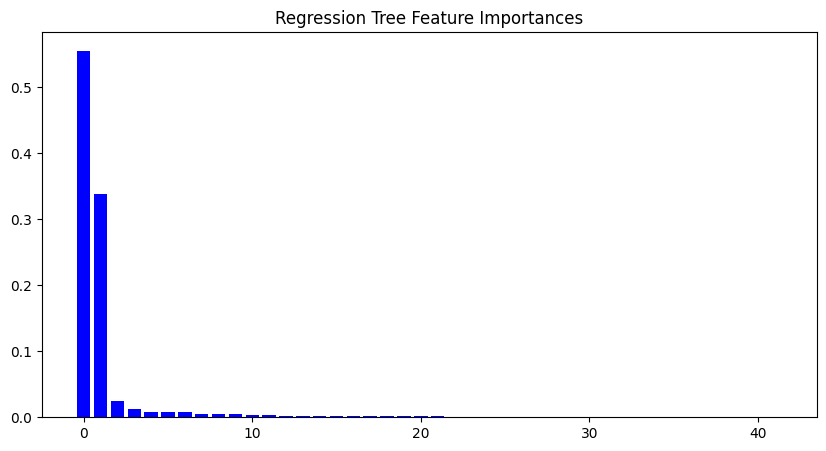

In [ ]:
importances = dtr.feature_importances_
features = dtr_X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Regression Tree Feature Importances")
plt.bar(range(dtr_X_train.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

## Comparison of Regression Models (OLS vs. Regression Tree)

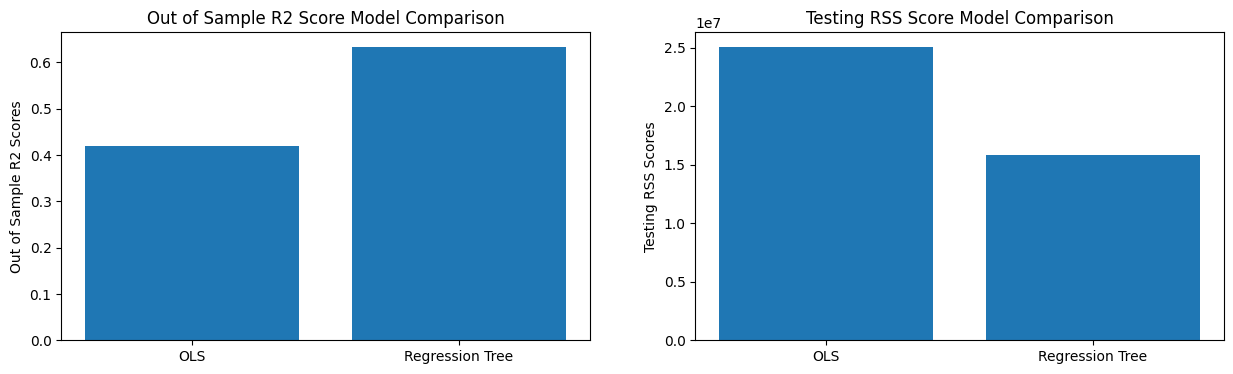

In [ ]:
import matplotlib.pyplot as plt

models = ['OLS', 'Regression Tree']
osr2s = [ols_osr2, dtr_osr2]
test_RSSs = [ols_test_rss, dtr_test_rss]

plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
plt.bar(models, osr2s)
plt.ylabel('Out of Sample R2 Scores')
plt.title('Out of Sample R2 Score Model Comparison')

plt.subplot(1,2,2)
plt.bar(models, test_RSSs)
plt.ylabel('Testing RSS Scores')
plt.title('Testing RSS Score Model Comparison');

Comparing our two regression models, we can clearly see that the regression tree model performs much better compared to the OLS model. The regression tree model has a significantly higher OSR2 score at above 0.6 compared to the OLS model having an OSR2 score much lower around 0.4. Similarly, when looking at the testing RSS scores, the regression tree has a score of around 9000000 lower than that of the OLS model.

# Classification Modeling
Considering tracks with a track popularity over 40 to be considered popular. Classification models to predict whether a track is popular or not.

## Logistic Regression

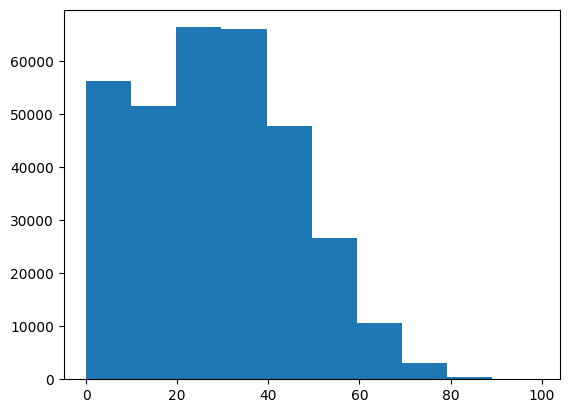

In [ ]:
plt.hist(train['track_popularity'])
#Probably will make a break along the lines of 40 track popularity for 1/0 for logistic regression model
#since it's a 50/50 ish split
tracks['over40'] = (tracks['track_popularity'] > 40).astype(int)

In [ ]:
train, test = train_test_split(tracks, test_size=0.3, random_state=88)
X_train = train.drop('track_popularity', axis=1)
y_train = train['track_popularity']
X_test = test.drop('track_popularity', axis=1)
y_test = test['track_popularity']
print(X_train.shape, X_test.shape)

(329026, 46) (141012, 46)


In [ ]:
VIF(train, ['duration_ms','explicit','danceability','energy','key','loudness','mode','acousticness',
            'instrumentalness','liveness','valence','tempo','time_signature','followers','artist_popularity'])

duration_ms          1.055264
explicit             1.051991
danceability         1.537024
energy               4.149880
key                  1.018456
loudness             2.502978
mode                 1.027044
acousticness         2.165865
instrumentalness     1.134507
liveness             1.078624
valence              1.705608
tempo                1.100166
time_signature       1.051884
followers            1.228751
artist_popularity    1.303838
dtype: float64

In [ ]:
VIF(train, ['duration_ms','explicit','danceability','key','loudness','mode','acousticness',
            'instrumentalness','liveness','valence','tempo','time_signature','followers','artist_popularity'])

duration_ms          1.054485
explicit             1.051468
danceability         1.518525
key                  1.018353
loudness             1.421752
mode                 1.024924
acousticness         1.412732
instrumentalness     1.107882
liveness             1.028398
valence              1.515340
tempo                1.097532
time_signature       1.049389
followers            1.227288
artist_popularity    1.301911
dtype: float64

Removed energy since the VIF was close to 5. Now all VIFs are below 2. This seems reasonable to have for my model. We will cut down more columns if they are statistically not significant or otherwise don't help our model.

In [ ]:
train.columns

Index(['track_name', 'track_popularity', 'duration_ms', 'explicit',
       'release_date', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'artist_id', 'followers',
       'artist_name', 'artist_popularity', '', 'adult_standards', 'album_rock',
       'art_rock', 'brill_building_pop', 'c-pop', 'classic_rock', 'cool_jazz',
       'country_rock', 'filmi', 'folk', 'folk_rock', 'hard_rock', 'hoerspiel',
       'jazz', 'latin', 'latin_pop', 'lounge', 'mellow_gold',
       'psychedelic_rock', 'rock', 'rock_en_espanol', 'soft_rock', 'soul',
       'vocal_jazz', 'over40'],
      dtype='object')

In [ ]:
logit = smf.logit(formula='over40 ~ duration_ms + explicit + danceability + key + loudness + mode + speechiness + acousticness + \
                          instrumentalness + liveness + valence + tempo + time_signature + followers',
                 data=train).fit()

print(logit.summary())

Optimization terminated successfully.
         Current function value: 0.491185
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 over40   No. Observations:               329026
Model:                          Logit   Df Residuals:                   329011
Method:                           MLE   Df Model:                           14
Date:                Sat, 06 May 2023   Pseudo R-squ.:                  0.1284
Time:                        17:01:25   Log-Likelihood:            -1.6161e+05
converged:                       True   LL-Null:                   -1.8542e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.7284      0.059    -12.421      0.000      -0.843      -0.613
duration_ms

Adding genres into the model

In [ ]:
logit2 = smf.logit(formula='over40 ~ duration_ms + explicit + danceability + key + loudness + mode + speechiness + acousticness \
                          + instrumentalness + liveness + valence + tempo + time_signature + followers \
                          + adult_standards + album_rock + art_rock + brill_building_pop + classic_rock + cool_jazz \
                          + country_rock + filmi + folk + folk_rock + hard_rock + hoerspiel + jazz + latin + latin_pop + lounge + mellow_gold \
                          + psychedelic_rock + rock + rock_en_espanol + soft_rock + soul + vocal_jazz',
                 data=train).fit()

print(logit2.summary())

Optimization terminated successfully.
         Current function value: 0.484597
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 over40   No. Observations:               329026
Model:                          Logit   Df Residuals:                   328988
Method:                           MLE   Df Model:                           37
Date:                Sat, 06 May 2023   Pseudo R-squ.:                  0.1401
Time:                        17:01:32   Log-Likelihood:            -1.5944e+05
converged:                       True   LL-Null:                   -1.8542e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.7530      0.059    -12.661      0.000      -0.870      -0.636
durat

Remove mode, time_signature, adult_standards, art_rock, and jazz because they all have very high p-values.

In [ ]:
logit3 = smf.logit(formula='over40 ~ duration_ms + explicit + danceability + key + loudness + speechiness + acousticness \
                          + instrumentalness + liveness + valence + tempo + followers \
                          + album_rock + brill_building_pop + classic_rock + cool_jazz \
                          + country_rock + filmi + folk + folk_rock + hard_rock + hoerspiel + latin + latin_pop + lounge + mellow_gold \
                          + psychedelic_rock + rock + rock_en_espanol + soft_rock + soul + vocal_jazz',
                 data=train).fit()

print(logit3.summary())

Optimization terminated successfully.
         Current function value: 0.484605
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 over40   No. Observations:               329026
Model:                          Logit   Df Residuals:                   328993
Method:                           MLE   Df Model:                           32
Date:                Sat, 06 May 2023   Pseudo R-squ.:                  0.1401
Time:                        17:01:35   Log-Likelihood:            -1.5945e+05
converged:                       True   LL-Null:                   -1.8542e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.7120      0.036    -19.793      0.000      -0.782      -0.641
durat

Now remove folk, folk_rock, and mellow_gold as they are the remaining features with high p-values.

In [ ]:
logit4 = smf.logit(formula='over40 ~ duration_ms + explicit + danceability + key + loudness + speechiness + acousticness \
                          + instrumentalness + liveness + valence + tempo + followers \
                          + album_rock + brill_building_pop + classic_rock + cool_jazz \
                          + country_rock + filmi + hard_rock + hoerspiel + latin + latin_pop + lounge \
                          + psychedelic_rock + rock + rock_en_espanol + soft_rock + soul + vocal_jazz',
                 data=train).fit()

print(logit4.summary())

Optimization terminated successfully.
         Current function value: 0.484615
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 over40   No. Observations:               329026
Model:                          Logit   Df Residuals:                   328996
Method:                           MLE   Df Model:                           29
Date:                Sat, 06 May 2023   Pseudo R-squ.:                  0.1401
Time:                        17:01:39   Log-Likelihood:            -1.5945e+05
converged:                       True   LL-Null:                   -1.8542e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.7127      0.036    -19.815      0.000      -0.783      -0.642
durat

In [ ]:
import numpy as np
np.exp(2.2918) - 1

8.892728576001097

We can see that the odds of a track being popular goes up by almost 900% when the danceability score goes up by 1.

Now all of our p-values are low, indicating that all of our features are siginifcant and thus we will keep all the remaining features and evaluate our 4th logistic regression model on the testing data.

In [ ]:
from sklearn.metrics import confusion_matrix

To remind you of what each element of the confusion matrix represents:

TN FP <br>
FN TP

In [ ]:
y_test = test['over40']
y_prob = logit4.predict(X_test)
y_pred = pd.Series([1 if x > 0.35 else 0 for x in y_prob], index=y_prob.index)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
def get_accuracy(cm):
    return (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
def get_tpr(cm):
    return (cm.ravel()[3]/(cm.ravel()[3] + cm.ravel()[2]))
def get_fpr(cm):
    return (cm.ravel()[1]/(cm.ravel()[1] + cm.ravel()[0]))

logit_accuracy = get_accuracy(cm)
logit_tpr = get_tpr(cm)
logit_fpr = get_fpr(cm)

print('Accuracy: ' + str(logit_accuracy))
print('TPR: ' + str(logit_tpr))
print('FPR: ' + str(logit_fpr))

Confusion Matrix : 
 [[90799 14841]
 [19088 16284]]
Accuracy: 0.7593892718350211
TPR: 0.46036412982019675
FPR: 0.1404865581219235


## CART - Classification Tree

In [ ]:
dtc_X_train = X_train.drop(['track_name', 'artist_name', 'artist_id', 'over40'], axis=1)
dtc_X_test = X_test.drop(['track_name', 'artist_name', 'artist_id', 'over40'], axis=1)

In [ ]:
dtc = DecisionTreeClassifier(min_samples_split=20,
                            ccp_alpha=0.00,
                            random_state = 88)
dtc.fit(dtc_X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  array = numpy.asarray(array, order=order, dtype=dtype)


DecisionTreeClassifier(min_samples_split=20, random_state=88)

In [ ]:
y_pred_ct = dtc.predict(dtc_X_test)
y_pred_ct_thresh = [1 if x >= 38 else 0 for x in y_pred_ct]
cm_ct = confusion_matrix(y_test, y_pred_ct_thresh)
ct_accuracy = get_accuracy(cm_ct)
ct_tpr = get_tpr(cm_ct)
ct_fpr = get_fpr(cm_ct)

print('Accuracy: ', ct_accuracy)
print('TPR: ', ct_tpr)
print('FPR: ', ct_fpr)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  array = numpy.asarray(array, order=order, dtype=dtype)


Accuracy:  0.8091935438118741
TPR:  0.6143559877869501
FPR:  0.12556796667928816


## Comparison of Classification Models (Baseline vs. Logistic vs. Classification)

In [ ]:
# Baseline model
# most frequent outcome for over40 is 0 ==> baseline model predicts everything as 0
below_40 = np.sum(test['over40'] == 0)
above_40 = np.sum(test['over40'] == 1)

baseline_accuracy = below_40 / (below_40 + above_40)
baseline_tpr = 0 / (0 + above_40) # TPR = TP/P = TP/(TP+FN)
baseline_fpr = 0 / (0 + below_40) # FPR = FP/N = FP/(FP+TN)

# create dataframe comparing
df = pd.DataFrame(np.array([[baseline_accuracy, logit_accuracy, ct_accuracy],
                            [baseline_tpr, logit_tpr,  ct_tpr],
                            [baseline_fpr, logit_fpr, ct_fpr]]),
                  columns=['Baseline', 'Logistic Reg', 'Classification Tree'],
                 index=['Accuracy', 'TPR', 'FPR'])
df = df.round(decimals = 3)
df

,Baseline,Logistic Reg,Classification Tree
Accuracy,0.749,0.759,0.809
TPR,0.000,0.460,0.614
FPR,0.000,0.140,0.126


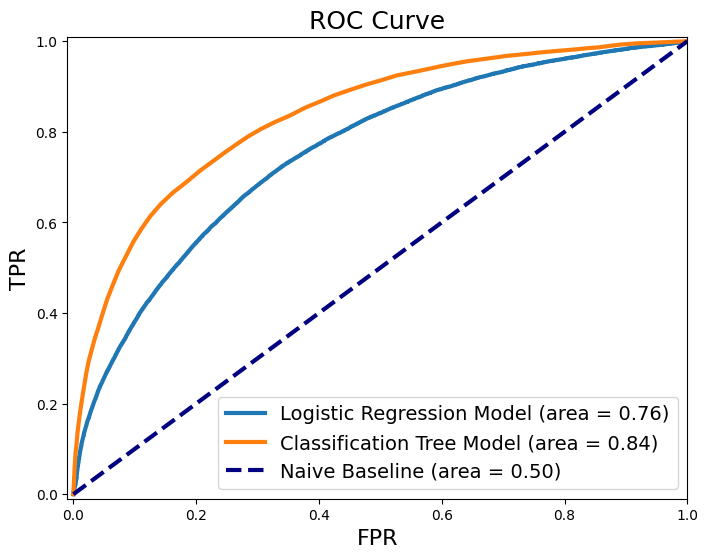

In [ ]:
# ROC/AUC Curve

from sklearn.metrics import roc_curve, auc
fpr, tpr, _mod = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
fpr_ct, tpr_ct, _mod = roc_curve(y_test, y_pred_ct)
roc_auc_ct = auc(fpr_ct, tpr_ct)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression Model (area = {:0.2f})'.format(roc_auc))
plt.plot(fpr_ct, tpr_ct, lw=3, label='Classification Tree Model (area = {:0.2f})'.format(roc_auc_ct))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)')
plt.legend(loc='lower right', fontsize=14)
plt.show()

When comparing our three classification models, we can clearly see that the classification tree model is the best performing model. While all three models have similar accuracies, the classification tree model has the highest accuracy at 0.809. While the accuracies were similar for all three models, the true positive rate of the classification tree model was significantly higher than the baseline and the logistic regression model at 0.614. Finally, the decision tree model has the lowest false positive rate at 0.126. Next when looking at the ROC curve, we can observe that the classification tree model has the largest area under the curve at 0.84 compared to the logistic regression model at an AUC of 0.76. Therefore since the classification tree model performed the best in every evaluation metric, we are confident that this model is the best peforming model in classifying whether a track is popular or not.